In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time # dthis for pause cuz api has limits 
from scipy import stats
from scipy.stats import linregress
import pandas as pd
from datetime import datetime
from api_keys import weather_api_key
output_data_file = "output_data/cities.csv"

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from citipy import citipy

In [10]:
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f" Data type: {type(cities)}.")
print()
print(f"The number of cities in the list: {len(cities)}.")
print()
print("Start printing city list")
print()
print(cities)

 Data type: <class 'list'>.

The number of cities in the list: 610.

Start printing city list

['port elizabeth', 'new norfolk', 'oktyabrskoye', 'kapaa', 'chagda', 'san rafael', 'hami', 'mataura', 'iqaluit', 'leningradskiy', 'bengkulu', 'lalibela', 'attawapiskat', 'isangel', 'jamestown', 'hobart', 'hilo', 'bloemfontein', 'yellowknife', 'sarai', 'taolanaro', 'faanui', 'kahului', 'davila', 'albany', 'puerto colombia', 'santa eulalia del rio', 'kaduy', 'norman wells', 'cape town', 'gimli', 'codrington', 'ulaanbaatar', 'lebu', 'longyearbyen', 'thompson', 'mar del plata', 'balykshi', 'rikitea', 'kavieng', 'kavaratti', 'georgetown', 'amderma', 'kaitangata', 'korla', 'lasa', 'arraial do cabo', 'the valley', 'nikolskoye', 'palu', 'dikson', 'torbay', 'margate', 'punta arenas', 'hithadhoo', 'airai', 'caborca', 'ribeira grande', 'nizhneyansk', 'marawi', 'puerto carreno', 'atuona', 'erenhot', 'mount gambier', 'warqla', 'mayna', 'brae', 'bluff', 'asau', 'illoqqortoormiut', 'busselton', 'tsihombe', 

In [11]:
city = "Paris"

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


In [13]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=983d8abd47f82d04e8c141735444cbdc&units=imperial&q='

In [14]:
# city = cities[0]
# parse/unpack json lists and dictionaries accordingly.
city = "Paris"

In [15]:
response = requests.get(query_url+city).json()
response['name']

'Paris'

In [16]:
response['coord']['lon']

2.3488

In [17]:
response['coord']['lat']

48.8534

In [18]:
response['main']

{'temp': 56.1,
 'feels_like': 55.78,
 'temp_min': 54.3,
 'temp_max': 57.22,
 'pressure': 1019,
 'humidity': 93}

In [19]:
response['main']['temp_max']

57.22

In [20]:
response['main']['humidity']

93

In [21]:
response['clouds']['all']

90

In [22]:
response["wind"]["speed"]

7

In [23]:
response["sys"]

{'type': 2,
 'id': 2012208,
 'country': 'FR',
 'sunrise': 1624420049,
 'sunset': 1624478284}

In [24]:
response["sys"]['country']

'FR'

In [25]:
response['dt']

1624421607

In [47]:
# Once unpack the data try to run on sample cities 
#  cities so that Gretel and NK does not exist so that it can handled by exception
# do not run all 600 hundred cities yet!!! . 
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
unfound_cities =[]
unfound_counter = 0
country =[]
date=[] 
#  cities so that Gretel and NK does not exist so that it can handled by exception
# do not run all 600 hundred cities yet!!! . 
# cities = ["London", "Paris", "Gretel","Chicago", "NK", "Boston", "Buenos Aires", "Cairo", "Algiers", "Sydney","Melbourne", "Queenstown","broome"]
# will add time.sleep(1) later when run actual large cities form api 
print("Beginning Data retrieval")
print("----------------------")
counter=1
new_cities = []
set_counter=1
for  i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_counter = set_counter + 1
        counter= 0
    print(f"Processing Record {counter} of set {set_counter}| {city} .")
    counter= counter+1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response["wind"]["speed"])
        new_cities.append(city)
        date.append(response['dt'])
        country.append(response["sys"]['country']) 
    except KeyError: 
        print("City is not found. Skipping... ")
        unfound_cities.append(city)
        unfound_counter=unfound_counter+1
        print(f"Number of cities unfound: {unfound_counter} | {city}.")
    time.sleep(1)
print("----------------------")
print("Ending Data retrieval.")    

Beginning Data retrieval
----------------------
Processing Record 1 of set 1| port elizabeth .
Processing Record 2 of set 1| new norfolk .
Processing Record 3 of set 1| oktyabrskoye .
Processing Record 4 of set 1| kapaa .
Processing Record 5 of set 1| chagda .
City is not found. Skipping... 
Number of cities unfound: 1 | chagda.
Processing Record 6 of set 1| san rafael .
Processing Record 7 of set 1| hami .
Processing Record 8 of set 1| mataura .
Processing Record 9 of set 1| iqaluit .
Processing Record 10 of set 1| leningradskiy .
Processing Record 11 of set 1| bengkulu .
Processing Record 12 of set 1| lalibela .
Processing Record 13 of set 1| attawapiskat .
City is not found. Skipping... 
Number of cities unfound: 2 | attawapiskat.
Processing Record 14 of set 1| isangel .
Processing Record 15 of set 1| jamestown .
Processing Record 16 of set 1| hobart .
Processing Record 17 of set 1| hilo .
Processing Record 18 of set 1| bloemfontein .
Processing Record 19 of set 1| yellowknife .
Pro

Processing Record 14 of set 4| nome .
Processing Record 15 of set 4| chernaya kholunitsa .
Processing Record 16 of set 4| bambous virieux .
Processing Record 17 of set 4| saint george .
Processing Record 18 of set 4| dharchula .
Processing Record 19 of set 4| scottsburgh .
City is not found. Skipping... 
Number of cities unfound: 17 | scottsburgh.
Processing Record 20 of set 4| dolores .
Processing Record 21 of set 4| kayes .
Processing Record 22 of set 4| ca mau .
Processing Record 23 of set 4| selfoss .
Processing Record 24 of set 4| los llanos de aridane .
Processing Record 25 of set 4| chincha alta .
Processing Record 26 of set 4| santana do livramento .
Processing Record 27 of set 4| dongkan .
Processing Record 28 of set 4| atar .
Processing Record 29 of set 4| talnakh .
Processing Record 30 of set 4| havoysund .
Processing Record 31 of set 4| hofn .
Processing Record 32 of set 4| mailani .
Processing Record 33 of set 4| mogok .
Processing Record 34 of set 4| belushya guba .
City 

Processing Record 35 of set 7| ust-uda .
Processing Record 36 of set 7| moss vale .
Processing Record 37 of set 7| newport .
Processing Record 38 of set 7| tabou .
Processing Record 39 of set 7| avera .
Processing Record 40 of set 7| araouane .
Processing Record 41 of set 7| khorixas .
Processing Record 42 of set 7| petrove .
Processing Record 43 of set 7| dien bien .
City is not found. Skipping... 
Number of cities unfound: 31 | dien bien.
Processing Record 44 of set 7| freeport .
Processing Record 45 of set 7| mallapuram .
Processing Record 46 of set 7| esperance .
Processing Record 47 of set 7| papar .
Processing Record 48 of set 7| la palma .
Processing Record 49 of set 7| sola .
Processing Record 0 of set 8| ragay .
Processing Record 1 of set 8| buraydah .
Processing Record 2 of set 8| ambilobe .
Processing Record 3 of set 8| maneadero .
Processing Record 4 of set 8| henties bay .
Processing Record 5 of set 8| quime .
Processing Record 6 of set 8| elektrenai .
Processing Record 7 

Processing Record 13 of set 11| rawson .
Processing Record 14 of set 11| evensk .
Processing Record 15 of set 11| mezen .
Processing Record 16 of set 11| strezhevoy .
Processing Record 17 of set 11| mandera .
Processing Record 18 of set 11| paamiut .
Processing Record 19 of set 11| voi .
Processing Record 20 of set 11| tabiauea .
City is not found. Skipping... 
Number of cities unfound: 41 | tabiauea.
Processing Record 21 of set 11| waingapu .
Processing Record 22 of set 11| achisay .
City is not found. Skipping... 
Number of cities unfound: 42 | achisay.
Processing Record 23 of set 11| tilichiki .
Processing Record 24 of set 11| bentiu .
Processing Record 25 of set 11| verdalsora .
City is not found. Skipping... 
Number of cities unfound: 43 | verdalsora.
Processing Record 26 of set 11| wonthaggi .
Processing Record 27 of set 11| luganville .
Processing Record 28 of set 11| sao filipe .
Processing Record 29 of set 11| kenai .
Processing Record 30 of set 11| catayauan .
Processing Reco

In [89]:
# print("Found Cities :")
# print(new_cities)
# print("Latitudes: ")
# print(lat)
# print("Longitude: ")
# print(lng)
# print("Max Temp:.")
# print(max_temp)
# print("Humidity: ")
# print(humidity)
# print("Cloudiness: ")
# print(cloudiness)
# print("Wind Speed: ")
# print(wind_speed)
# print("Country: ")
# print(country)
# print("Date:")
# print(date)
# print("Unfound_cities: ")
# print(unfound_cities)

In [90]:
weather_df = pd.DataFrame({"City":new_cities,
               "Lat": lat ,
               "Lng": lng, 
               "Max Temp": max_temp,
               "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date   
               })

In [91]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,52.11,93,0,2.30,ZA,1624422912
1,new norfolk,-42.7826,147.0587,51.93,80,100,1.54,AU,1624422914
2,oktyabrskoye,43.0645,44.7417,75.34,73,0,2.24,RU,1624422915
3,kapaa,22.0752,-159.3190,84.18,77,40,3.00,US,1624422916
4,san rafael,-34.6177,-68.3301,47.70,72,64,4.23,AR,1624422919
...,...,...,...,...,...,...,...,...,...
555,ilongero,-4.6667,34.8667,57.04,77,7,11.14,TZ,1624423659
556,uruzgan,32.8333,66.0000,82.13,10,0,1.79,AF,1624423661
557,markova,48.6758,24.4138,63.99,80,12,1.23,UA,1624423662
558,bambanglipuro,-7.9500,110.2833,67.60,77,76,10.71,ID,1624423664


In [51]:
df_check = weather_df[weather_df.iloc[:,4]>100]
df_check 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


1. In the above weather_df, there is no humidity of city is greater than 100%;
   therefore, there is no need to do drop(), and weather_df used as is.  

In [53]:
weather_df.to_csv("output_data/cities.csv",encoding='utf-8', index=False)

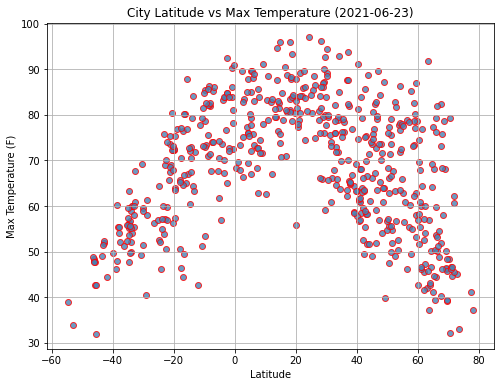

In [54]:
plt.figure(figsize=(8,6))
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='steelblue',edgecolor = "red", alpha=0.8)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

##### In the above graph (City Latitude vs Max Temperature) shows:
1. When latitude changes from -60 to +20 max temp of cities rise then falls back
until Lat of 80 while having some sort of symmetry . 
2. 20 is being highest point, then  both sides drop equally range of 60 where Latitude spreads.
Quadratic function may fit nicely, unless if it is splitted @ latidue 20 and do two separate linear regressions. 

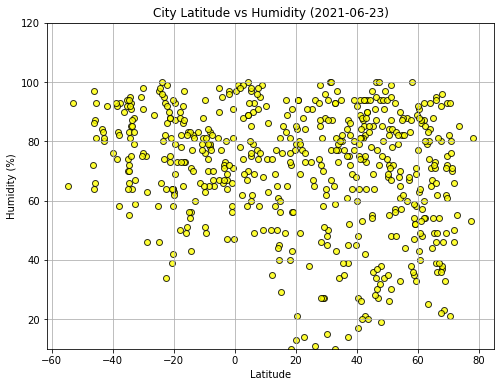

In [55]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.figure(figsize=(8,6))
#sns.set()
plt.scatter(x_values, y_values, color='yellow', edgecolor = "black", alpha=0.8)
plt.grid()
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()


####  In the above graph, City Latitude vs Humidity scatter plot shows that:
  Regardless of lattiude change, more cities are scattered where humidity is between 60% & 100%. 
  But, when latidude is >= 0, there are more cities where humdity is below 40% compare to opposite same latitude. 
  It may show different pattern as season changes since plot are made on current weather data. 

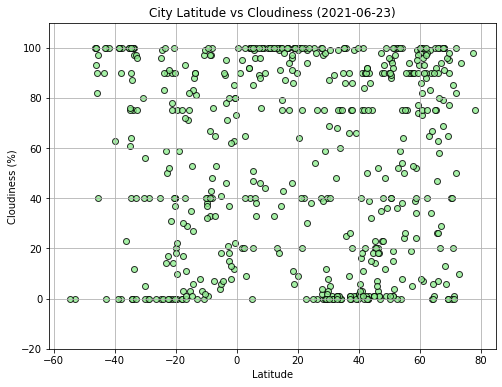

In [56]:
plt.figure(figsize=(8,6))
x_value = weather_df["Lat"]
y_value = weather_df["Cloudiness"]
plt.scatter(x_value, y_value, color='lightgreen', edgecolor = "black", alpha=0.8)
plt.grid()
plt.ylim(-20,(y_value.max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

In [ ]:
##### In the above plot (From City Latitude vs Cloudiness) shows : 
1. When latitude between (-40 and -20, cities are clustered @ 0 cloudiness.
2. Also, when latitude between +20 and +50 cities are clustered @ 0 cloudiness.
3. When latitude between 0 and 20, more cities clustered close to 100% cloudiness.
4. It looks like, if the step functions used, it may fit properly. 

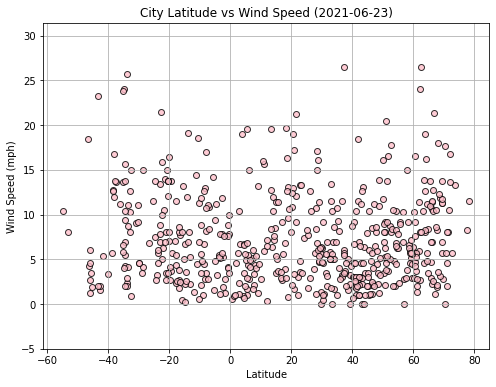

In [57]:
plt.figure(figsize=(8,6))
x_value = weather_df["Lat"]
y_value = weather_df["Wind Speed"]
plt.scatter(x_value, y_value, color='pink', edgecolor = "black",alpha=0.8)
plt.grid()
plt.ylim((weather_df["Wind Speed"].min()-5),(weather_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()

##### In the above plot (City Latitude vs Wind Speed shows):
1. Density of cities scattered is between where Wind  speed is between 0-10 mph, or rather shows that it has less dependcy on the latitude. 

In [ ]:
northern = weather_df.loc[weather_df["Lat"] >= 0.0]
northern.reset_index(inplace=True)
southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [81]:
# Define plotting function
def plotLinearRegression(x_value,y_value,xlabel,ylabel,labelpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

The r-squared is: -0.6107006455691596


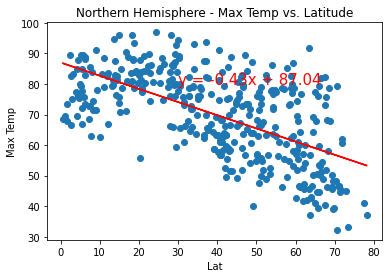

In [83]:
# Northern Hemisphere: Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
labelpos = (30,80)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,labelpos,5)

The r-squared is: 0.7764320919634117


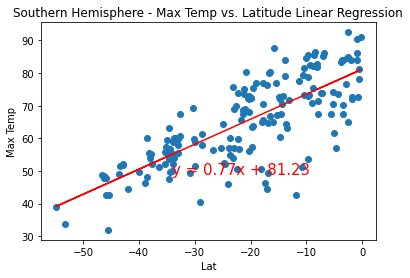

In [86]:
# Southern Hemisphere: Max Temp vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Max Temp"
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
labelpos = (-34,49)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,labelpos,6)

The r-squared is: -0.11777052275684464


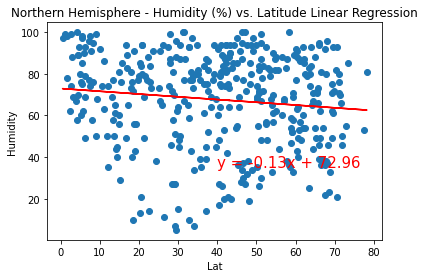

In [62]:
# Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
labelpos = (40,35)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,labelpos,7)

The r-squared is: -0.2090779952142059


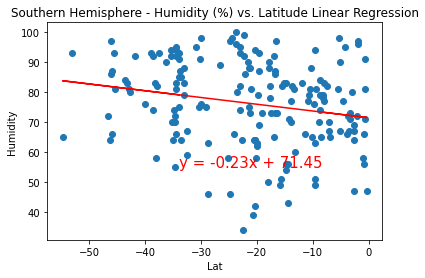

In [63]:
# Southern Hemisphere : Humidity (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Humidity"
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
labelpos = (-34,55)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,labelpos,8)

The r-squared is: -0.08725933619813499


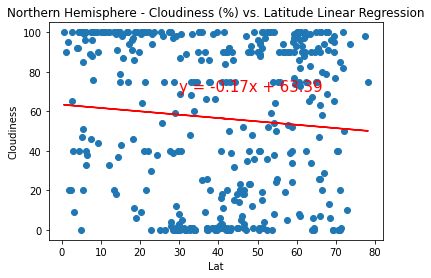

In [64]:
# Northern Hemisphere :  Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
labelpos = (30,70)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,labelpos,9)

The r-squared is: -0.1936651495096971


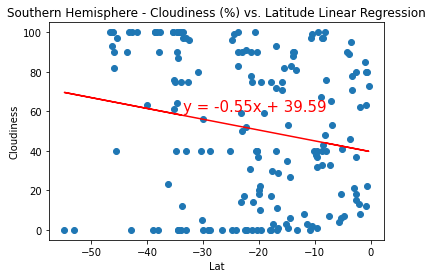

In [65]:
# Southern Hemisphere :  Cloudiness (%) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Cloudiness"
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
labelpos = (-33.5,60)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,labelpos,10)

The r-squared is: 0.10988824187053702


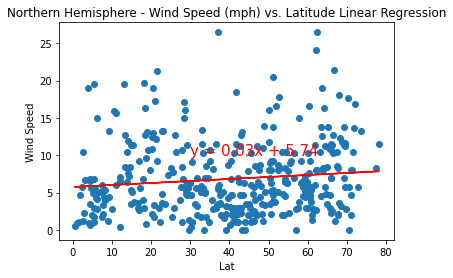

In [66]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
labelpos = (30,10)
plotLinearRegression(northern[xlabel],northern[ylabel],xlabel,ylabel,labelpos,11)

The r-squared is: -0.14568625928932305


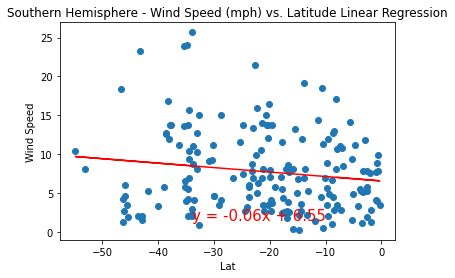

In [67]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression
xlabel = "Lat"
ylabel = "Wind Speed"
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
labelpos = (-34,1.5)
plotLinearRegression(southern[xlabel],southern[ylabel],xlabel,ylabel,labelpos,12)

##  Observations

1. Max Temperature:
   Temperature in south hemisphere increases as latitude decrease/getting closer to the equator, the opposite happens in northern hemisphere. 
   Note: The Highest Max temperature occurs cities are located around latitude of 20.   
2. Humidity: 
   In both Northern and Southern hemisphere where cities are located latitude wise does not have a strong correlations between Latidue and Humidity. 
3. Northern and Southern hemisphere both higher density cloudiness close to zero versus close to hundred in depends on ranges of latitudes shows on the graph. 
4. Regardless of latitude, in both most cities in regions of southern and northern hemisphere the wind speed ranges between 0-10 mph. 
   So wind does not heavily effected by where city location is laitude wise, it is rather other affected by other factors.
   